# Case Study 2: Analyzing Gun Deaths in the United States (2012-2014)

This study analyzes gun deaths in the United States from 2012 to 2014. We'll explore various questions using data visualization.

## Data Loading
Load the data using pandas from 'full_data.csv'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
sns.set_style('whitegrid')

# Load the data
df = pd.read_csv('full_data.csv')

# Display first few rows
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


## Question 1: Number of Annual Suicide Gun Deaths by Gender (2012-2014)

Filter for suicide deaths and visualize count by year and gender.

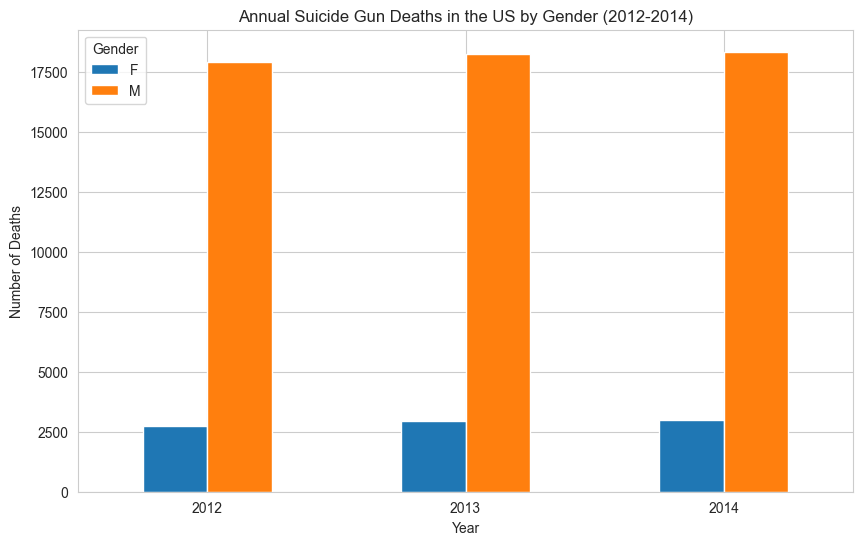

In [2]:
# Filter for suicide deaths
suicides = df[df['intent'] == 'Suicide']

# Group by year and sex, count the deaths
suicide_by_year_gender = suicides.groupby(['year', 'sex']).size().unstack()

# Plot
ax = suicide_by_year_gender.plot(kind='bar', figsize=(10,6))
ax.set_title('Annual Suicide Gun Deaths in the US by Gender (2012-2014)')
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

## Question 2: Number of Gun Deaths by Race per 100,000 People (2012-2014)

Calculate deaths per 100,000 by race using approximate US population data.

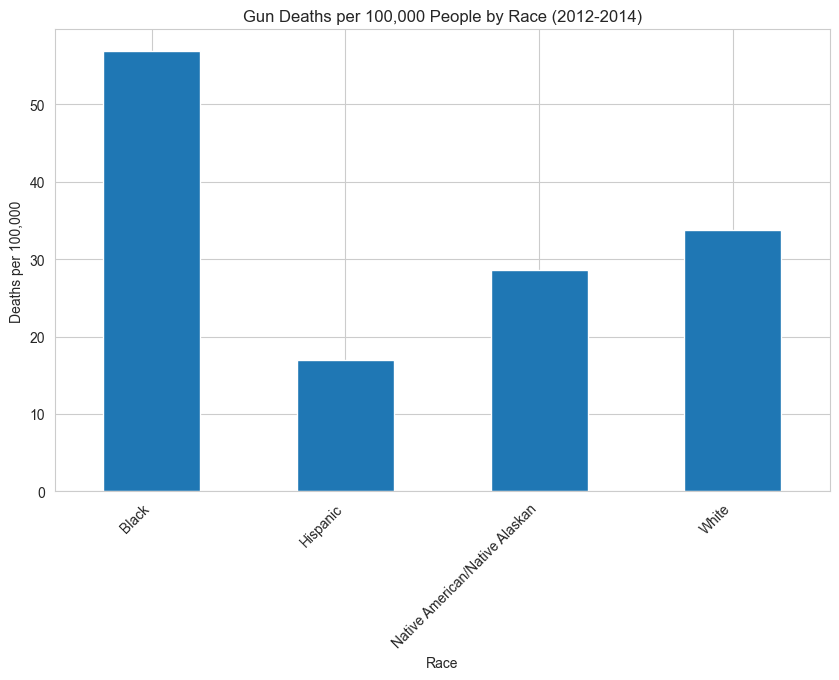

In [3]:
# Population estimates (approximate averages 2012-2014 in millions)
# These are rough estimates based on US Census data
population_race = {
    'White': 196000000,  # ~62%
    'Black': 41000000,   # ~13%
    'Hispanic': 53300000, # ~17%
    'Asian': 15700000,   # ~5%
    'Native American/Native Alaskan': 3200000, # ~1%
    'Other': 6300000    # ~2%
}

# Total deaths by race
deaths_by_race = df.groupby('race').size()

# Calculate per 100,000
deaths_per_100k_race = (deaths_by_race / pd.Series(population_race)) * 100000
deaths_per_100k_race = deaths_per_100k_race.dropna()

# Plot
plt.figure(figsize=(10,6))
ax = deaths_per_100k_race.plot(kind='bar')
ax.set_title('Gun Deaths per 100,000 People by Race (2012-2014)')
ax.set_ylabel('Deaths per 100,000')
ax.set_xlabel('Race')
plt.xticks(rotation=45, ha='right')
plt.show()

## Question 3: Annual Number of Gun Deaths by Cause (Average 2012-2014)

Average the annual counts by intent/cause.

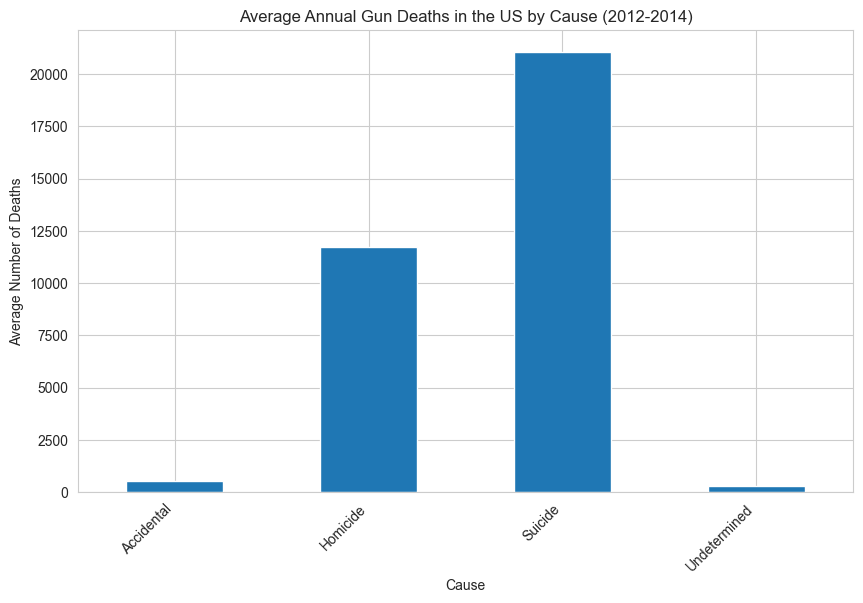

In [4]:
# Group by year and intent, count
deaths_by_year_cause = df.groupby(['year', 'intent']).size().unstack().fillna(0)

# Average across years
avg_deaths_by_cause = deaths_by_year_cause.mean()

# Plot
plt.figure(figsize=(10,6))
ax = avg_deaths_by_cause.plot(kind='bar')
ax.set_title('Average Annual Gun Deaths in the US by Cause (2012-2014)')
ax.set_ylabel('Average Number of Deaths')
ax.set_xlabel('Cause')
plt.xticks(rotation=45, ha='right')
plt.show()

## Question 4: Percentage per 100,000 People of Annual Gun Deaths by Cause

Calculate percentage of total population.

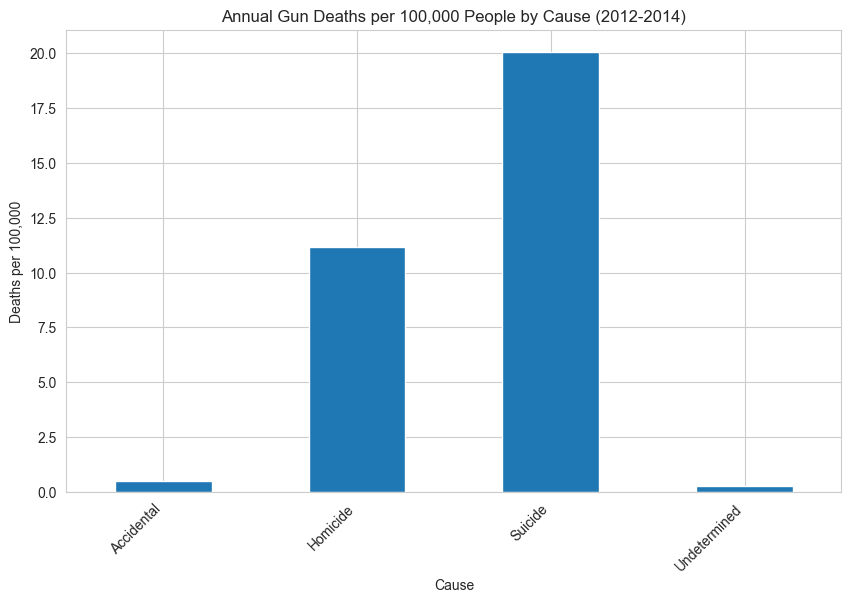

In [5]:
# Total population ~315 million
total_population = 315000000

# Deaths per 100k by cause per year
total_deaths_by_cause = df.groupby('intent').size()

# Per 100k total
deaths_per_100k_cause = (total_deaths_by_cause / total_population) * 100000

# Plot
plt.figure(figsize=(10,6))
ax = deaths_per_100k_cause.plot(kind='bar')
ax.set_title('Annual Gun Deaths per 100,000 People by Cause (2012-2014)')
ax.set_ylabel('Deaths per 100,000')
ax.set_xlabel('Cause')
plt.xticks(rotation=45, ha='right')
plt.show()

## Question 5: Percentage of Annual Suicide Gun Deaths by Year

Proportion of all gun deaths that are suicides each year.

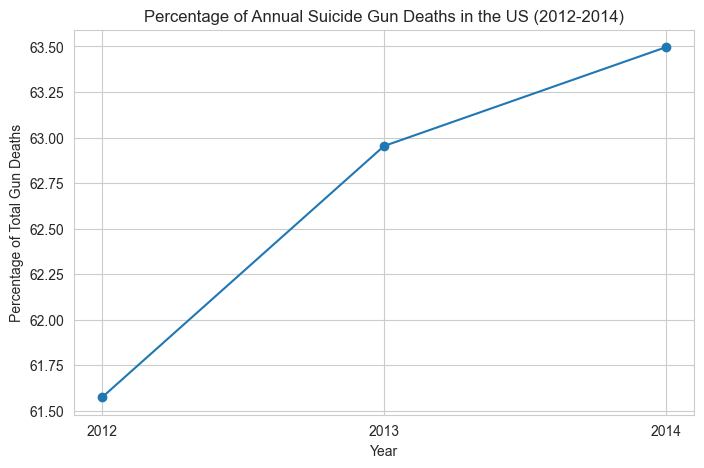

In [6]:
# Total deaths by year
total_by_year = df.groupby('year').size()

# Suicide deaths by year
suicide_by_year = suicides.groupby('year').size()

# Percentage
suicide_percentage_by_year = (suicide_by_year / total_by_year) * 100

# Plot
plt.figure(figsize=(8,5))
ax = suicide_percentage_by_year.plot(kind='line', marker='o')
ax.set_title('Percentage of Annual Suicide Gun Deaths in the US (2012-2014)')
ax.set_ylabel('Percentage of Total Gun Deaths')
ax.set_xlabel('Year')
plt.xticks(range(2012,2015))
plt.show()